# Lab 1

## Problem 1

### Task 1

In [38]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

b = 0.4
k = 4
m = 0.1

t0 = 0
tf = 3
increment = 0.01
t = np.arange(t0, tf, increment)
x0 = [2, 0]


In [39]:
def solve_spring_damper(y0=x0, t=t, b=b, k=k, m=m):
    """solver for spring-damper system

    ----------
    ### Parameters
      `y0` : `np.array`
          initial values
      `t` : `np.array`
          time coordinates
      `args` : `[float, float, float]`
          `b` - damping coefficient,
          `k` - spring stiffness,
          `m` - mass

    -------
    ### Returns
      `np.array`
          solution to the system
    """
    A = np.array([[0, 1], [-k / m, -b / m]])

    def state_space(y, t):
        return np.dot(A, y)

    return odeint(func=state_space, y0=y0, t=t)


In [40]:
def solve_list(args):
    """solver for list of systems

    ----------
    ### Parameters
        `args` : `[[solver, arguments]]`

    -------
    ### Returns
        `[solutions]`


    -------
    ### Examples
    >>> sol = solve_list([[solve_spring_damper,{}], [solve_spring_damper,{"b": 4}]])
    """

    # where to save results
    res = [None for i in range(len(args))]

    # apply solvers to arguments
    for i, (f, arg) in enumerate(args):
        res[i] = f(**arg)

    return res


In [ ]:
def add_graph(ax=None, x=None, y=None, color=None, label=None):
    """adds a graph to axis"""
    ax.plot(x, y, color=color, label=(f"${label}$" if label else None))


In [41]:
def plot_graphs(
    ax=None,
    x=None,
    xlabel=None,
    ylabel=None,
    title=None,
    graphs=None,
):
    ax.grid()
    # enable latex
    ax.set(
        xlabel=(f"${xlabel}$" if xlabel else None),
        ylabel=(f"${ylabel}$" if ylabel else None),
    )

    # plot graphs
    for graph in graphs:
        add_graph(ax=ax, x=x, **graph)

    # there might be no label
    _, labels = ax.get_legend_handles_labels()
    if labels:
        ax.legend(loc="best")

    if title:
        ax.set_title(f"${title}$")


def plot_sol(args):
    """plot separately list of systems

    -------
    ### Parameters
        `args` : `[dict]`
            `x` : `np.array`
            `xlabel` : `str`
                latex string
            `ylabel` : `str`
                latex string
            `title` : `str`
                latex string
            `graph` : `[dict]`
                `y` : `np.array`
                `color` : `str`
                    see [options](https://matplotlib.org/stable/gallery/color/named_colors.html)
                `label` : `str`
                    latex string
    -------
    ### Returns
      `None`

    -------
    ### Examples
    """

    # plots will be aligned into a line
    fig, ax = plt.subplots(1, len(args), figsize=(4 * len(args), 4))

    # convert to iterable
    ax = np.array(ax).reshape(-1)

    # set padding between plots
    fig.tight_layout(pad=4.0)

    for i, arg in enumerate(args):
        plot_graphs(ax[i], **arg)

    plt.show()


In [42]:
sol = solve_list([[solve_spring_damper, {}]])


### Task 2

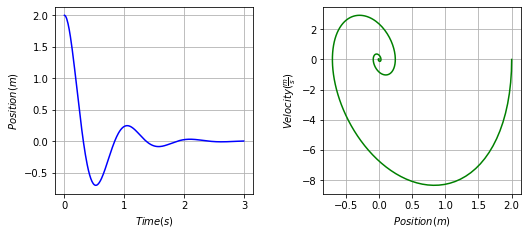

In [43]:
plot_sol(
    [
        {
            "xlabel": "Time (s)",
            "ylabel": "Position (m)",
            "x": t,
            "graphs": [{"y": sol[0][:, 0], "color": "b"}],
        },
        {
            "x": sol[0][:, 0],
            "xlabel": "Position (m)",
            "ylabel": "Velocity (\\frac{m}{s})",
            "graphs": [
                {
                    "color": "g",
                    "y": sol[0][:, 1],
                }
            ],
        },
    ]
)


### Task 3

[See Problem 1. Task 3.](https://www.mathcha.io/editor/KvDNQSGkSK6H6gsrNMwnEsvEQzPOh3VBj0MTVqPlP4) for theoretical solution.

In [44]:
solver = solve_spring_damper
sol = solve_list(
    [
        [solver, {}],
        [solver, {"b": 0}],
        [solver, {"b": 2 * np.sqrt(k * m)}],
        [solver, {"b": 2 * np.sqrt(k * m) + 1}],
    ]
)


In [45]:
def modified_dict_copy(original, change):
    modified_copy = dict(original)
    modified_copy.update(change)
    return modified_copy


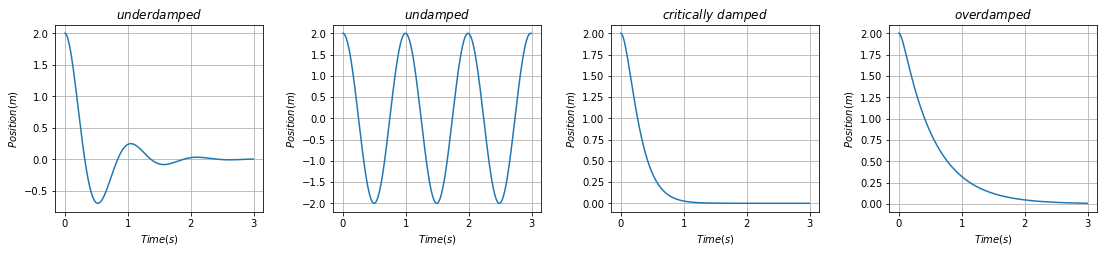

In [46]:
template = {"x": t, "xlabel": "Time (s)", "ylabel": "Position (m)"}
titles = ["underdamped", "undamped", "critically\\ damped", "overdamped"]
plot_configs = [
    modified_dict_copy(template, {"title": titles[i], "graphs": [{"y": sol[i][:, 0]}]})
    for i in range(4)
]
plot_sol(plot_configs)


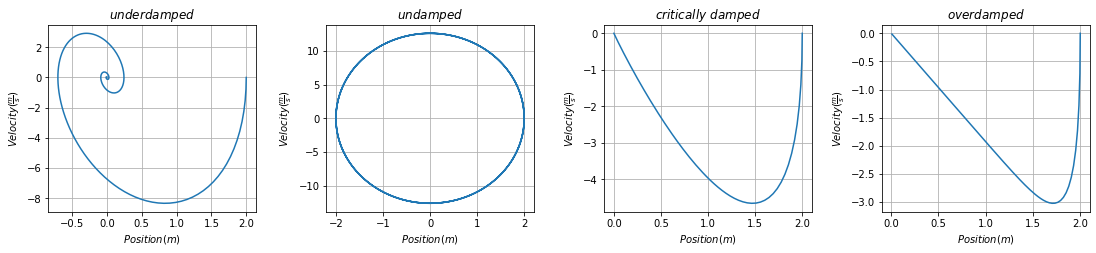

In [47]:
template = {
    "xlabel": "Position (m)",
    "ylabel": "Velocity (\\frac{m}{s})",
    "graphs": [
        {
            "color": "b",
        }
    ],
}
plot_configs = [
    modified_dict_copy(
        template,
        {"x": sol[i][:, 0], "graphs": [{"y": sol[i][:, 1]}], "title": titles[i]},
    )
    for i in range(4)
]
plot_sol(plot_configs)


## Problem 2

### Task 1

[See Problem 2. Task 1.](https://www.mathcha.io/editor/KvDNQSGkSK6H6gsrNMwnEsvEQzPOh3VBj0MTVqPlP4) for theoretical solution.

In [48]:
# delta x1,delta x2, x1_dot, x2_dot
x0 = [0, 0, -1, 1]
k = 200
m1 = 40
m2 = 40

ti = 0
tf = 10
t = np.arange(ti, tf, increment)


In [49]:
def double_masses(y0=x0, t=t, k=k, m1=m1, m2=m2):
    """solver for double masses system

    ----------
    ### Parameters
      `y0` : `np.array`
          initial values
      `t` : `np.array`
          time coordinates
      `args` : `[float, float, float]`
          `k` - spring stiffness,
          `m1` - first mass
          `m2` - second mass

    -------
    ### Returns
      `np.array`
          solution to the system
    """
    A = np.array(
        [
            [0, 0, -2 * k / m1, k / m1],
            [0, 0, k / m2, -2 * k / m2],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
        ]
    )

    def state_space(y, t):
        return np.dot(A, y)

    return odeint(func=state_space, y0=y0, t=t)


### Task 2

In [50]:
solver = double_masses
sol = solve_list([[solver, {}]])


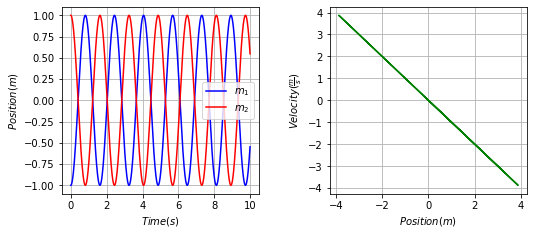

In [51]:
plot_sol(
    [
        {
            "xlabel": "Time (s)",
            "ylabel": "Position (m)",
            "x": t,
            "graphs": [
                {"y": sol[0][:, 2], "color": "b", "label": "m_1"},
                {"y": sol[0][:, 3], "color": "r", "label": "m_2"},
            ],
        },
        {
            "x": sol[0][:, 0],
            "xlabel": "Position (m)",
            "ylabel": "Velocity (\\frac{m}{s})",
            "graphs": [
                {
                    "color": "g",
                    "y": sol[0][:, 1],
                }
            ],
        },
    ]
)


### Task 3

In [52]:
sol = solve_list(
    [[solver, {}], [solver, {"y0": [0, 0, 1, 0]}], [solver, {"y0": [0, 0, 1, 1]}]]
)


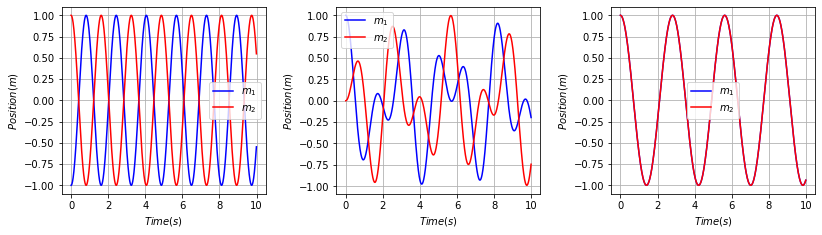

In [53]:
template = {"xlabel": "Time (s)", "ylabel": "Position (m)"}

plot_configs = [
    modified_dict_copy(
        template,
        {
            "x": t,
            "graphs": [
                {"y": sol[i][:, 2], "color": "b", "label": "m_1"},
                {"y": sol[i][:, 3], "color": "r", "label": "m_2"},
            ],
        },
    )
    for i in range(3)
]
plot_sol(plot_configs)


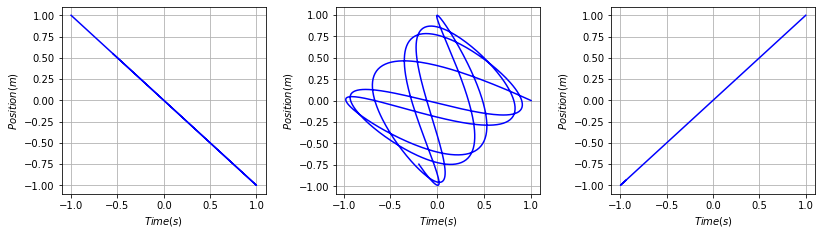

In [54]:
xt = {"xlabel": "Time (s)", "ylabel": "Position (m)"}

colors = ["b", "r"]
vx_plot_configs = [
    modified_dict_copy(
        xt,
        {
            "x": sol[i][:, 2],
            "graphs": [
                {"y": sol[i][:, 3], "color": "b"},
            ],
        },
    )
    for i in range(3)
]
plot_sol(vx_plot_configs)
